# Importing Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Image Preprocessing and Augmentation

In [2]:
dataset_path = 'dataset/'  # this folder should contain your 17 class folders


image_size = (128, 128)  # Resize images to 128x128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,      # 80% train, 20% val
    rotation_range=15,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

#  Load Training and Validation sets

In [3]:
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [4]:
num_classes = train_data.num_classes
print("Number of classes:", num_classes)

Number of classes: 15


# CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Output layer
])


# Compile Model

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early stopping

In [7]:

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Training the Model

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15


517/517 [==============================] - 427s 817ms/step - loss: 1.5379 - accuracy: 0.5024 - val_loss: 0.8475 - val_accuracy: 0.7094
Epoch 2/15
517/517 [==============================] - 390s 754ms/step - loss: 0.9147 - accuracy: 0.6976 - val_loss: 0.5795 - val_accuracy: 0.7938
Epoch 3/15
517/517 [==============================] - 387s 749ms/step - loss: 0.7269 - accuracy: 0.7555 - val_loss: 0.5109 - val_accuracy: 0.8350
Epoch 4/15
517/517 [==============================] - 422s 816ms/step - loss: 0.5942 - accuracy: 0.8017 - val_loss: 0.3986 - val_accuracy: 0.8680
Epoch 5/15
517/517 [==============================] - 434s 839ms/step - loss: 0.5135 - accuracy: 0.8266 - val_loss: 0.3089 - val_accuracy: 0.9027
Epoch 6/15
517/517 [==============================] - 392s 758ms/step - loss: 0.4403 - accuracy: 0.8547 - val_loss: 0.2923 - val_accuracy: 0.9044
Epoch 7/15
517/517 [==============================] - 397s 768ms/step - loss: 0.4031 - accuracy: 0.8665 - val_loss: 0.2899

# Save model

In [10]:
model.save("CropCure_model.h5")

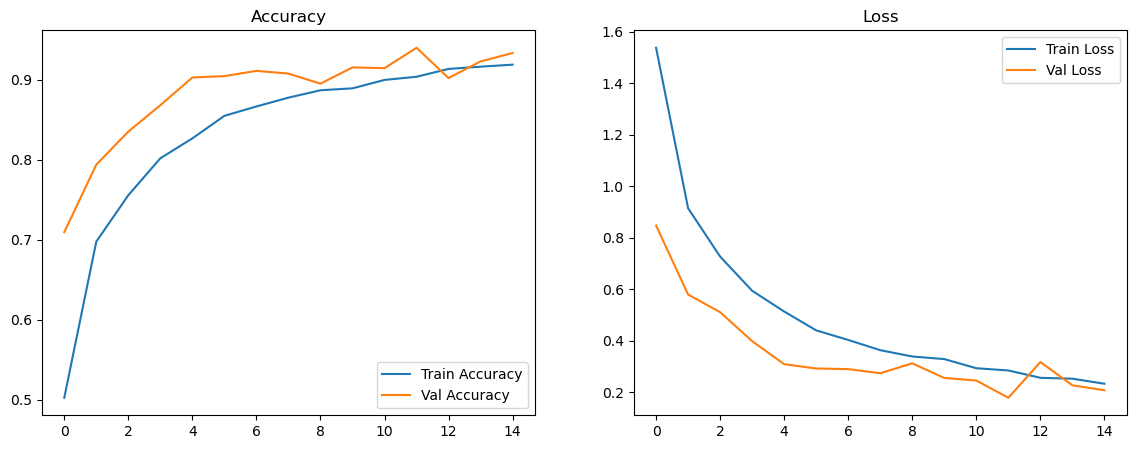

In [11]:
# Plot Accuracy & Loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()
